### Music Recommendation

##### 2020710058 Applied Data Science Doo-yeonog, Lee

In [1]:
# Load Python libraries
from sklearn import model_selection, metrics, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## Data Preparation

In [2]:
# Load data
df = pd.read_csv('data/train.csv')

# 1% sample of items
df = df.sample(frac=0.01)
print(df.shape)
df.head(1)

(73774, 6)


,msno,song_id,source_system_tab,source_screen_name,source_type,target
4557921,59jB0YiIwhcdyqIYUy7l2BJBdm8R8mHACPWfG8YjyuI=,7yOjucngPEja1YGEcc5CMuBLRzmyd+XrU+L3GcZDxWg=,discover,NaN,online-playlist,0


In [3]:
# Load and join songs data
songs = pd.read_csv('data/songs.csv')
df = pd.merge(df, songs, on='song_id', how='left')
del songs

# Load and join songs data
members = pd.read_csv('data/members.csv')
df = pd.merge(df, members, on='msno', how='left')
del members

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 0 to 73773
Data columns (total 18 columns):
msno                      73774 non-null object
song_id                   73774 non-null object
source_system_tab         73555 non-null object
source_screen_name        69738 non-null object
source_type               73585 non-null object
target                    73774 non-null int64
song_length               73774 non-null int64
genre_ids                 72649 non-null object
artist_name               73774 non-null object
composer                  56929 non-null object
lyricist                  41954 non-null object
language                  73773 non-null float64
city                      73774 non-null int64
bd                        73774 non-null int64
gender                    44273 non-null object
registered_via            73774 non-null int64
registration_init_time    73774 non-null int64
expiration_date           73774 non-null int64
dtypes: float64(1), int64(7), obj

In [5]:
df.isnull().sum()

msno                          0
song_id                       0
source_system_tab           219
source_screen_name         4036
source_type                 189
target                        0
song_length                   0
genre_ids                  1125
artist_name                   0
composer                  16845
lyricist                  31820
language                      1
city                          0
bd                            0
gender                    29501
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [6]:
# Replace NA
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [7]:
# Create Dates

# registration_init_time
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [8]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,59jB0YiIwhcdyqIYUy7l2BJBdm8R8mHACPWfG8YjyuI=,7yOjucngPEja1YGEcc5CMuBLRzmyd+XrU+L3GcZDxWg=,discover,unknown,online-playlist,0,216894,444,Yeoeun,unknown,...,female,4,2016-06-11,2017-08-18,2016,6,11,2017,8,18
1,dEirl2AEI6Yte8Q2HNtuax30OqepRwVzFmLyHOWsCIM=,OCf6ja6rohWVy5UBE/XTSOf9YxiMrkCIaLTkFQ+nNf8=,discover,unknown,top-hits-for-artist,1,212453,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,...,unknown,9,2016-06-28,2017-09-30,2016,6,28,2017,9,30
2,cawN/88OIgfzw3o43QBFJM8QL+H12koa4U0VbEAUCnM=,uMHKb8SrN4YGZLZvOfepysi/YSeEdVciKYDtDPX6rYo=,radio,Radio,radio,0,275017,465,Berry,unknown,...,unknown,7,2015-11-04,2017-10-04,2015,11,4,2017,10,4
3,Cxg0g+JicmeneW19M9HAh4KfRY2IdFU00vU9pVEvEQI=,dyfjbCPtrhu0Pqj3F3J1Z+1YtyWLuXNr1osvNZNchPY=,my library,Local playlist more,local-library,1,220160,444|1259,BIGBANG,TEDDY| G-DRAGON,...,unknown,9,2015-08-21,2017-08-20,2015,8,21,2017,8,20
4,JXRPXjzB6ETig/oUoyC/FzMvb1MMFjZQtVF0lOXa2ko=,mcYOteyPPVdG51WbJvl1dpmJMOcSZ6Q2YvSiVsTqiNE=,discover,Album more,album,0,226152,921,Various Artists,GAEMI/Kim Se Jin,...,unknown,9,2017-01-25,2018-01-26,2017,1,25,2018,1,26


In [9]:
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [10]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

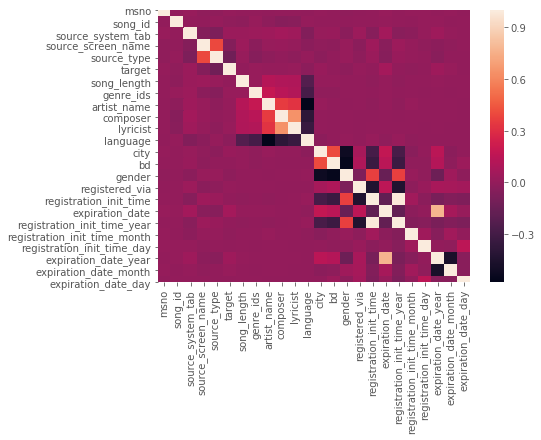

In [11]:
# Сorrelation matrix
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

In [12]:
df = df.drop(['expiration_date', 'lyricist'], 1)

In [13]:
# Model with the best estimator
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'target']], df.target)

RandomForestClassifier(max_depth=25, n_estimators=250)

In [14]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

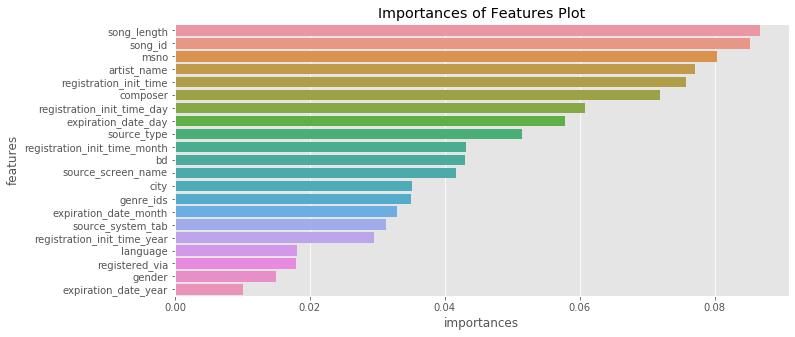

In [15]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [16]:
# Drop columns with importances < 0.04
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [17]:
# Selected columns
df.columns

Index(['msno', 'song_id', 'source_screen_name', 'source_type', 'target',
       'song_length', 'artist_name', 'composer', 'bd',
       'registration_init_time', 'registration_init_time_month',
       'registration_init_time_day', 'expiration_date_day'],
      dtype='object')

In [18]:
target = df.pop('target')
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(df, target, test_size = 0.3)

model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(train_data, train_labels)

predict_labels = model.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62     11025
           1       0.63      0.66      0.65     11108

    accuracy                           0.63     22133
   macro avg       0.63      0.63      0.63     22133
weighted avg       0.63      0.63      0.63     22133

